In [1]:
# Packages

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters of the model

tau_m = 10.0  # membrane time constant (ms)
V_th = -55.0  # firing threshold (mV)
V_r = -70.0  # reset potential (mV)
t_ref = 2.0  # refractory period (ms)
I = lambda t: 20.0 if t >= 5.0 and t <= 25.0 else 0.0  # input current (nA)

In [3]:
# Parameters used in the simulation

dt = 0.1  # time step (ms)
t_sim = 50.0  # simulation duration (ms)

In [4]:
# Initialisation of variables

t = np.arange(0, t_sim, dt)
V_m = np.zeros(len(t))
V_m[0] = V_r
t_spike = -np.inf

In [5]:
# Simulating the model

for i in range(1, len(t)):
    # Compute the input current at the current time step
    I_input = I(t[i])
    
    # Update the membrane potential using Euler's method
    V_m[i] = V_m[i-1] + dt/tau_m * (-V_m[i-1] + I_input)
    
    # If the membrane potential reaches the threshold, emit a spike and reset the membrane potential
    if V_m[i] >= V_th:
        V_m[i] = V_r
        t_spike = t[i]
    
    # During the refractory period, hold the membrane potential at the reset potential
    if t[i] < t_spike + t_ref:
        V_m[i] = V_r

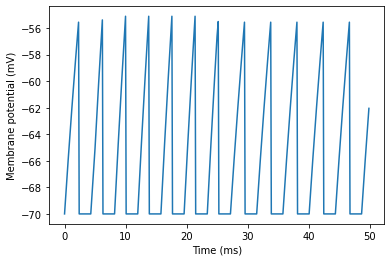

In [6]:
# Plotting the membrane potential

plt.plot(t, V_m)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.show()
